# EnergyPlus and TRNSYS Example

In [1]:
import os
from zerobnl import CoSim

You can safely ignore the following error (it will also be in the nodes logs):

RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

-> [Numpy documentation](https://github.com/numpy/numpy/pull/432)

In [2]:
sim = CoSim()

# There are 4 environments in this example.

sim.create_meta_model("MetaPLANT", [("COG_QDH", "kW"),("COG_FlagIN","-"),("COG_mdotTOT", "kgs")], [("COG_Tout", "Cdeg"),("COG_MDOTtoTES", "kgs"),("COG_MDOTfromTES", "kgs"),("COG_TTESin", "Cdeg"),("COG_soo", "-"),("COG_MDOTtoLOAD", "kgs")]) # Set, Get
sim.create_environment("EnvPLANT", "wrapper_plant.py", "Dockerfile_na")

sim.create_meta_model("MetaLSHP", [("LSHP_QDH", "kW"),("LSHP_FlagIN", "-")], [("LSHP_ToutL", "Cdeg"),("LSHP_MDOTtoLOAD", "kgs"),("LSHP_soo", "-"),("LSHP_MDOTtoTES", "kgs"),("LSHP_MDOTfromTES", "kgs"),("LSHP_TTESin", "Cdeg")]) # Set, Get
sim.create_environment("EnvLSHP", "wrapper_lshp.py", "Dockerfile_lshp")

sim.create_meta_model("MetaTES", [("TES_FlagIN", "-"),("TES_Tin","Cdeg"),("TES_MDOTinC","kgs"),("TES_MDOTinD","kgs")],[("TES_ToutD", "Cdeg"),("TES_socOUT", "-"),("TES_MDOToutD", "kgs"),("TES_soo", "-")]) # Set, Get
sim.create_environment("EnvTES", "wrapper_tes.py", "Dockerfile_tes")

sim.create_meta_model("MetaHOB", [("HOB_Tset", "Cdeg"),("HOB_FlagIN","-"),("HOB_mdotIN","kgs"),("HOB_Tin","Cdeg")],[]) # Set, Get
sim.create_environment("EnvHOB", "wrapper_hob.py", "Dockerfile_hob")

sim.create_meta_model("MetaDEM1", [("Tthermostat", "Cdeg")], [("QDH", "W"),("Tindoor","Cdeg")]) # Set, Get
sim.create_environment("EnvDEM1", "wrapper_dem1.py", "Dockerfile_na")
sim.create_meta_model("MetaDEM2", [("Tthermostat", "Cdeg")], [("QDH", "W"),("Tindoor","Cdeg")]) # Set, Get
sim.create_environment("EnvDEM2", "wrapper_dem2.py", "Dockerfile_na")

sim.create_meta_model("MetaCTRL", [("demandOK", "-"),("demandOK_mdot", "-"),("demandOK_price", "-")], [("COG_FlagOUT", "-"),("LSHP_FlagOUT", "-"),("HOB_FlagOUT", "-"),("TEScog_FlagOUT", "-"),("TESlshp_FlagOUT", "-")]) # Set, Get
sim.create_environment("EnvCTRL", "wrapper_ctrl.py", "Dockerfile_ctrl")

sim.create_meta_model("MetaLCTRL", [("TindoorIN_0", "Cdeg"),("TindoorIN_1", "Cdeg"),("mdotTOT", "kgs"),("TEScog_socIN", "-"),("TESlshp_socIN", "-"),("ToutdoorP", "Cdeg")], [("Tth_0", "Cdeg"),("Tth_1", "Cdeg"),("demandFlag", "-"),("demandFlag_mdot", "-"),("TsetP", "Cdeg")]) # Set, Get
sim.create_environment("EnvLCTRL", "wrapper_lctrl.py", "Dockerfile_lctrl")

sim.create_meta_model("MetaPCTRL", [], [("demandFlag_price", "-")]) # Set, Get
sim.create_environment("EnvPCTRL", "wrapper_pctrl.py", "Dockerfile_pctrl")

sim.create_meta_model("MetaWEATHER", [], [("TdryBulb", "Cdeg")]) # Set, Get
sim.create_environment("EnvWEATHER", "wrapper_weather.py", "Dockerfile_weather")

sim.create_meta_model("MetaHNET", [("HNET_QDH_1", "W"),("HNET_QDH_2", "W"),("HNET_TsSET", "Cdeg")], [("HNET_QDH", "kW"),("HNET_MDOTtot", "kgs")]) # Set, Get
sim.create_environment("EnvHNET", "wrapper_shnet.py", "Dockerfile_shnet")

sim.create_meta_model("MetaISEL", [("soo1", "-"),("mdot1", "kgs"),("Tin1", "Cdeg"),("soo2", "-"),("mdot2", "kgs"),("Tin2", "Cdeg"),("soo3", "-"),("mdot3", "kgs"),("Tin3", "Cdeg"),("soo4", "-"),("mdot4", "kgs"),("Tin4", "Cdeg")], [("mdot", "kgs"),("Tout", "Cdeg")]) # Set, Get
sim.create_environment("EnvISEL", "wrapper_isel.py", "Dockerfile_isel")

# There is one model per each environment in this example. 
# OBS!! The name Base# indicates a model. Each model is contained in a node. There can be more nodes in each environment.
sim.add_node("Base0", "MetaLCTRL", "EnvLCTRL", init_values={},files=['TS_set.txt'],local=False)
sim.add_node("Base0_1", "MetaPCTRL", "EnvPCTRL", init_values={},files=['COGWaste_cost.txt','LSHP_cost.txt','ElPrices2016_Stockholm.txt'],local=False)
sim.add_node("Base1", "MetaCTRL", "EnvCTRL", init_values={},local=False)
sim.add_node("Base2", "MetaPLANT", "EnvPLANT", init_values={"COG_QDH":2000,"COG_FlagIN":1}, files=["COGplant.fmu"],local=True)
sim.add_node("Base2_1", "MetaLSHP", "EnvLSHP", init_values={},local=False)
sim.add_node("Base3", "MetaDEM1", "EnvDEM1", init_values={}, files=["Residential_DH_1.fmu"],local=True)
sim.add_node("Base3_1", "MetaDEM2", "EnvDEM2", init_values={}, files=["Residential_DH_2.fmu"],local=True)
sim.add_node("Base4", "MetaHOB", "EnvHOB", init_values={},local=False)
sim.add_node("Base5", "MetaTES", "EnvTES", init_values={},local=False)
sim.add_node("Base5_1", "MetaTES", "EnvTES", init_values={},local=False)
sim.add_node("Base6", "MetaWEATHER", "EnvWEATHER", init_values={},files=['SWE_Stockholm.Arlanda.024600_IWEC.epw'],local=False)
sim.add_node("Base7", "MetaHNET", "EnvHNET", init_values={},local=False)
sim.add_node("Base8", "MetaISEL", "EnvISEL", init_values={},local=False)

# Links among nodes
sim.add_link("Base0", "Tth_0", "Base3", "Tthermostat") # ok - Control on demand (Thermostat set point)
sim.add_link("Base0", "Tth_1", "Base3_1", "Tthermostat") # ok - Control on demand (Thermostat set point)
sim.add_link("Base0", "demandFlag", "Base1", "demandOK") # ok - Precontrol on the supply units based on weather (Tset) and demand (mdot) and availability of capacity in the buildings (Tindoor)
sim.add_link("Base0", "demandFlag_mdot", "Base1", "demandOK_mdot") # ok - Precontrol on the supply units based on weather (Tset) and demand (mdot) and availability of capacity in the buildings (Tindoor) 
sim.add_link("Base0_1", "demandFlag_price", "Base1", "demandOK_price")
sim.add_link("Base0", "TsetP", "Base4", "HOB_Tset") # ok - Information passed onto the HOB to full fill the load's request
sim.add_link("Base0", "TsetP", "Base7", "HNET_TsSET") # ok - Information passed onto the HOB to full fill the load's request

sim.add_link("Base1", "COG_FlagOUT", "Base2", "COG_FlagIN") # ok - Control on COG 
sim.add_link("Base1", "LSHP_FlagOUT", "Base2_1", "LSHP_FlagIN")
sim.add_link("Base1", "HOB_FlagOUT", "Base4", "HOB_FlagIN") # ok - Control on HOB
sim.add_link("Base1", "TEScog_FlagOUT", "Base5", "TES_FlagIN") # ok - Control on TES
sim.add_link("Base1", "TESlshp_FlagOUT", "Base5_1", "TES_FlagIN") 

sim.add_link("Base2", "COG_MDOTtoTES", "Base5", "TES_MDOTinC") # ok Total - Direct interaction COG-TES
sim.add_link("Base2", "COG_MDOTfromTES", "Base5", "TES_MDOTinD") # ok Total - Direct interaction COG-TES
sim.add_link("Base2", "COG_TTESin", "Base5", "TES_Tin") # ok - Direct interaction COG-TES
sim.add_link("Base2", "COG_Tout", "Base8", "Tin1") # ok Total - Direct interaction COG-TES
sim.add_link("Base2", "COG_MDOTtoLOAD", "Base8", "mdot1") # ok - Direct interaction COG-TES
sim.add_link("Base2", "COG_soo", "Base8", "soo1") # ok - Direct interaction COG-TES

sim.add_link("Base2_1", "LSHP_MDOTtoTES", "Base5_1", "TES_MDOTinC") # ok Total - Direct interaction COG-TES
sim.add_link("Base2_1", "LSHP_MDOTfromTES", "Base5_1", "TES_MDOTinD") # ok Total - Direct interaction COG-TES
sim.add_link("Base2_1", "LSHP_TTESin", "Base5_1", "TES_Tin") # ok - Direct interaction COG-TES
sim.add_link("Base2_1", "LSHP_ToutL", "Base8", "Tin3") # ok Total - Direct interaction COG-TES
sim.add_link("Base2_1", "LSHP_MDOTtoLOAD", "Base8", "mdot3") # ok - Direct interaction COG-TES
sim.add_link("Base2_1", "LSHP_soo", "Base8", "soo3") # ok - Direct interaction COG-TES

sim.add_link("Base3", "QDH", "Base7", "HNET_QDH_1") # ok - Feedback to the supply system
sim.add_link("Base3", "Tindoor", "Base0", "TindoorIN_0") # ok - Feedback to the local control to define the supply units (1)
sim.add_link("Base3_1", "Tindoor", "Base0", "TindoorIN_1") # ok - Feedback to the local control to define the supply units (1)
sim.add_link("Base3_1", "QDH", "Base7", "HNET_QDH_2") # ok - Feedback to the supply system

sim.add_link("Base5", "TES_ToutD", "Base8", "Tin2") # ok - Direct interaction TES - HOB (dis)
sim.add_link("Base5", "TES_MDOToutD", "Base8", "mdot2") # ok Total - Direct interaction TES - HOB (dis)
sim.add_link("Base5", "TES_soo", "Base8", "soo2") # ok Total - Direct interaction TES - HOB (dis)
sim.add_link("Base5", "TES_socOUT", "Base0", "TEScog_socIN") # ok

sim.add_link("Base5_1", "TES_ToutD", "Base8", "Tin4") # ok - Direct interaction TES - HOB (dis)
sim.add_link("Base5_1", "TES_MDOToutD", "Base8", "mdot4") # ok Total - Direct interaction TES - HOB (dis)
sim.add_link("Base5_1", "TES_soo", "Base8", "soo4") # ok Total - Direct interaction TES - HOB (dis)
sim.add_link("Base5_1", "TES_socOUT", "Base0", "TESlshp_socIN") # ok

sim.add_link("Base6", "TdryBulb", "Base0", "ToutdoorP") # ok

sim.add_link("Base7", "HNET_QDH", "Base2", "COG_QDH") # ok
sim.add_link("Base7", "HNET_QDH", "Base2_1", "LSHP_QDH") # ok
sim.add_link("Base7", "HNET_MDOTtot", "Base2", "COG_mdotTOT") # ok Total
sim.add_link("Base7", "HNET_MDOTtot", "Base0", "mdotTOT") # ok Total

sim.add_link("Base8", "mdot", "Base4", "HOB_mdotIN") # ok Total - Direct interaction COG-HOB
sim.add_link("Base8", "Tout", "Base4", "HOB_Tin") # ok - Direct interaction COG-HOB

# Create groups from the simulation sequence. Nodes in the same group run in parallel. 
# A group is defined within the first level of square brackets.
sim.create_sequence([["Base3","Base3_1"],["Base7"],["Base2","Base2_1"],["Base5","Base5_1"],["Base8"],["Base4"],["Base6"],["Base0","Base0_1"],["Base1"]])
sim.set_time_unit("seconds")
sim.create_steps([3600] * 744)

Once the next step has been launched, logging `INFO :: Waiting for local nodes to run..`, you need to run tho following command `wrapper_eplus.py Base1 GRP1` in the indicated folder (in a dedicated environment) in order to run the local node.

In [3]:
sim.run()

INFO :: Waiting for local nodes to run...
INFO :: Simulation finished in 5 min and 45 sec


If you see `INFO :: Simulation finished in X min and Y sec` it means everything went well.
You can find logs of the nodes in the file `nodes.log`, it's a text file you can open it directly in Jupyter or in your favorite text editor.

At the begining of the file you will find a serie of:

`Step X/10 : DO SOMETHING
 ---> 29d2f3226daf`
 
It's the logs of the creation of the Docker image, based on the provided Dockerfile (here `Dockerfile_base`).

Then all the logs are structures in the same way:

`<node>    | <level> :: <message>`

* `node` refers to the concerned simulation node or orchestrator
* `level` can be `DEBUG`: used for development purpose, `INFO`: giving you info on the running process, `WARNING`: warning you on action to make or some weird behaviour, `ERROR`: something went wrong and `CRITICAL`: something went really wrong.
* `message` is the body of the log, it describes what's happening.

You can also find information on the ongoing simulation in the file `activity.log` (in the root folder for the main processus and on the temporary folder for each node)

In [4]:
sim.connect_to_results_db()
sim.get_list_of_available_results()

,IN/OUT,Node,Attribute
0,IN,Base0,ToutdoorP
1,OUT,Base2_1,LSHP_MDOTfromTES
2,IN,Base0,TindoorIN_1
3,OUT,Base2,COG_MDOTtoLOAD
4,IN,Base4,HOB_FlagIN
5,OUT,Base0,TsetP
6,IN,Base8,Tin2
7,IN,Base2_1,LSHP_FlagIN
8,IN,Base3,Tthermostat
9,OUT,Base5,TES_MDOToutD


The name to the stored results are build as `<type>||<node>||<attribute>`.

`type` can be:
* `IN` if it's an input attribute (to set - stored automatically)
* `OUT` if it's an output attribute (to get - stored automatically)
* `X` if it's an internal value (stored by the user, using the `save_attribute()` method in the wrapper)

Knowing this, you can create matching pattern using `*` in order to properly select results.

In [5]:
file1 = open('Results_Tset_Th_demFlag.csv','w')
for key, value in sim.get_results_by_pattern("OUT*Base0*").items():
    print(key)
    print(value) 
    file1.write(str(value))
file1.close()

INFO :: Matching results: Base0 - TsetP
INFO :: Matching results: Base0 - demandFlag
INFO :: Matching results: Base0_1 - demandFlag_price
INFO :: Matching results: Base0 - demandFlag_mdot
INFO :: Matching results: Base0 - Tth_0
INFO :: Matching results: Base0 - Tth_1


OUT||Base0_1||demandFlag_price
2000-01-01 01:00:00    1.0
2000-01-01 02:00:00    1.0
2000-01-01 03:00:00    1.0
2000-01-01 04:00:00    1.0
2000-01-01 05:00:00    1.0
2000-01-01 06:00:00    1.0
2000-01-01 07:00:00    1.0
2000-01-01 08:00:00    1.0
2000-01-01 09:00:00    1.0
2000-01-01 10:00:00    1.0
2000-01-01 11:00:00    1.0
2000-01-01 12:00:00    1.0
2000-01-01 13:00:00    1.0
2000-01-01 14:00:00    1.0
2000-01-01 15:00:00    1.0
2000-01-01 16:00:00    1.0
2000-01-01 17:00:00    1.0
2000-01-01 18:00:00    1.0
2000-01-01 19:00:00    1.0
2000-01-01 20:00:00    1.0
2000-01-01 21:00:00    1.0
2000-01-01 22:00:00    1.0
2000-01-01 23:00:00    1.0
2000-01-02 00:00:00    1.0
2000-01-02 01:00:00    1.0
2000-01-02 02:00:00    1.0
2000-01-02 03:00:00    1.0
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
                      ... 
2000-01-30 19:00:00    1.0
2000-01-30 20:00:00    1.0
2000-01-30 21:00:00    1.0
2000-01-30 22:00:00    1.0
2000-01-30 23:00:00    1

In [6]:
file2 = open('Results_Flags.csv','w')
for key, value in sim.get_results_by_pattern("OUT*Base1*").items():
    print(key)
    print(value) 
    file2.write(str(value))
file2.close()

INFO :: Matching results: Base1 - LSHP_FlagOUT
INFO :: Matching results: Base1 - TEScog_FlagOUT
INFO :: Matching results: Base1 - TESlshp_FlagOUT
INFO :: Matching results: Base1 - HOB_FlagOUT
INFO :: Matching results: Base1 - COG_FlagOUT


OUT||Base1||COG_FlagOUT
2000-01-01 01:00:00    1.0
2000-01-01 02:00:00    1.0
2000-01-01 03:00:00    1.0
2000-01-01 04:00:00    1.0
2000-01-01 05:00:00    1.0
2000-01-01 06:00:00    1.0
2000-01-01 07:00:00    1.0
2000-01-01 08:00:00    1.0
2000-01-01 09:00:00    1.0
2000-01-01 10:00:00    1.0
2000-01-01 11:00:00    1.0
2000-01-01 12:00:00    1.0
2000-01-01 13:00:00    1.0
2000-01-01 14:00:00    1.0
2000-01-01 15:00:00    1.0
2000-01-01 16:00:00    1.0
2000-01-01 17:00:00    1.0
2000-01-01 18:00:00    1.0
2000-01-01 19:00:00    1.0
2000-01-01 20:00:00    1.0
2000-01-01 21:00:00    1.0
2000-01-01 22:00:00    1.0
2000-01-01 23:00:00    1.0
2000-01-02 00:00:00    1.0
2000-01-02 01:00:00    1.0
2000-01-02 02:00:00    1.0
2000-01-02 03:00:00    1.0
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
                      ... 
2000-01-30 19:00:00    1.0
2000-01-30 20:00:00    1.0
2000-01-30 21:00:00    1.0
2000-01-30 22:00:00    1.0
2000-01-30 23:00:00    1.0
2000

In [7]:
file3 = open('Results_COGout.csv','w')
for key, value in sim.get_results_by_pattern("OUT*Base2*").items():
    print(key)
    print(value) 
    file3.write(str(value))
file3.close()

INFO :: Matching results: Base2_1 - LSHP_MDOTfromTES
INFO :: Matching results: Base2 - COG_MDOTtoLOAD
INFO :: Matching results: Base2 - COG_soo
INFO :: Matching results: Base2 - COG_TTESin
INFO :: Matching results: Base2_1 - LSHP_TTESin
INFO :: Matching results: Base2 - COG_MDOTfromTES
INFO :: Matching results: Base2_1 - LSHP_soo
INFO :: Matching results: Base2 - COG_MDOTtoTES
INFO :: Matching results: Base2 - COG_Tout
INFO :: Matching results: Base2_1 - LSHP_MDOTtoLOAD
INFO :: Matching results: Base2_1 - LSHP_ToutL
INFO :: Matching results: Base2_1 - LSHP_MDOTtoTES


OUT||Base2_1||LSHP_MDOTfromTES
2000-01-01 01:00:00    0.0
2000-01-01 02:00:00    0.0
2000-01-01 03:00:00    0.0
2000-01-01 04:00:00    0.0
2000-01-01 05:00:00    0.0
2000-01-01 06:00:00    0.0
2000-01-01 07:00:00    0.0
2000-01-01 08:00:00    0.0
2000-01-01 09:00:00    0.0
2000-01-01 10:00:00    0.0
2000-01-01 11:00:00    0.0
2000-01-01 12:00:00    0.0
2000-01-01 13:00:00    0.0
2000-01-01 14:00:00    0.0
2000-01-01 15:00:00    0.0
2000-01-01 16:00:00    0.0
2000-01-01 17:00:00    0.0
2000-01-01 18:00:00    0.0
2000-01-01 19:00:00    0.0
2000-01-01 20:00:00    0.0
2000-01-01 21:00:00    0.0
2000-01-01 22:00:00    0.0
2000-01-01 23:00:00    0.0
2000-01-02 00:00:00    0.0
2000-01-02 01:00:00    0.0
2000-01-02 02:00:00    0.0
2000-01-02 03:00:00    0.0
2000-01-02 04:00:00    0.0
2000-01-02 05:00:00    0.0
2000-01-02 06:00:00    0.0
                      ... 
2000-01-30 19:00:00    0.0
2000-01-30 20:00:00    0.0
2000-01-30 21:00:00    0.0
2000-01-30 22:00:00    0.0
2000-01-30 23:00:00    0

In [8]:
file4 = open('Results_Tindoor_QR.csv','w')
for key, value in sim.get_results_by_pattern("OUT*Base3*").items():
    print(key)
    print(value) 
    file4.write(str(value))
file4.close()

INFO :: Matching results: Base3 - Tindoor
INFO :: Matching results: Base3_1 - QDH
INFO :: Matching results: Base3_1 - Tindoor
INFO :: Matching results: Base3 - QDH


OUT||Base3_1||QDH
2000-01-01 01:00:00    9.537368e-316
2000-01-01 02:00:00    9.537361e-316
2000-01-01 03:00:00    9.537361e-316
2000-01-01 04:00:00    9.537361e-316
2000-01-01 05:00:00    9.537361e-316
2000-01-01 06:00:00     1.192131e+03
2000-01-01 07:00:00     1.259803e+03
2000-01-01 08:00:00     1.255767e+03
2000-01-01 09:00:00     1.252952e+03
2000-01-01 10:00:00    9.537363e-316
2000-01-01 11:00:00     6.299829e+02
2000-01-01 12:00:00     6.360040e+02
2000-01-01 13:00:00     1.140844e+03
2000-01-01 14:00:00     1.624581e+03
2000-01-01 15:00:00     1.255803e+03
2000-01-01 16:00:00     1.260723e+03
2000-01-01 17:00:00    9.537371e-316
2000-01-01 18:00:00    9.537368e-316
2000-01-01 19:00:00     1.264481e+02
2000-01-01 20:00:00     5.636724e+02
2000-01-01 21:00:00    9.537369e-316
2000-01-01 22:00:00    9.537361e-316
2000-01-01 23:00:00    9.537361e-316
2000-01-02 00:00:00    9.537361e-316
2000-01-02 01:00:00    9.537368e-316
2000-01-02 02:00:00    9.537361e-316
2000-01-02 03:00:00 

In [9]:
file5 = open('Results_TESout.csv','w')
for key, value in sim.get_results_by_pattern("OUT*Base5*").items():
    print(key)
    print(value) 
    file5.write(str(value))
file5.close()

INFO :: Matching results: Base5 - TES_MDOToutD
INFO :: Matching results: Base5 - TES_soo
INFO :: Matching results: Base5_1 - TES_soo
INFO :: Matching results: Base5_1 - TES_MDOToutD
INFO :: Matching results: Base5 - TES_socOUT
INFO :: Matching results: Base5_1 - TES_ToutD
INFO :: Matching results: Base5 - TES_ToutD
INFO :: Matching results: Base5_1 - TES_socOUT


OUT||Base5_1||TES_MDOToutD
2000-01-01 01:00:00    507.0
2000-01-01 02:00:00    507.0
2000-01-01 03:00:00    507.0
2000-01-01 04:00:00    507.0
2000-01-01 05:00:00    507.0
2000-01-01 06:00:00    507.0
2000-01-01 07:00:00    507.0
2000-01-01 08:00:00    507.0
2000-01-01 09:00:00    507.0
2000-01-01 10:00:00    507.0
2000-01-01 11:00:00    507.0
2000-01-01 12:00:00    507.0
2000-01-01 13:00:00    507.0
2000-01-01 14:00:00    507.0
2000-01-01 15:00:00    507.0
2000-01-01 16:00:00    507.0
2000-01-01 17:00:00    507.0
2000-01-01 18:00:00    507.0
2000-01-01 19:00:00    507.0
2000-01-01 20:00:00    507.0
2000-01-01 21:00:00    507.0
2000-01-01 22:00:00    507.0
2000-01-01 23:00:00    507.0
2000-01-02 00:00:00    507.0
2000-01-02 01:00:00    507.0
2000-01-02 02:00:00    507.0
2000-01-02 03:00:00    507.0
2000-01-02 04:00:00    507.0
2000-01-02 05:00:00    507.0
2000-01-02 06:00:00    507.0
                       ...  
2000-01-30 19:00:00    507.0
2000-01-30 20:00:00    507.0
2000-01-30 21:00

In [10]:
file6 = open('Results_Toutdoor.csv','w')
for key, value in sim.get_results_by_pattern("OUT*Base6*").items():
    print(key)
    print(value) 
    file6.write(str(value))
file6.close()

INFO :: Matching results: Base6 - TdryBulb


OUT||Base6||TdryBulb
2000-01-01 01:00:00    4.0
2000-01-01 02:00:00    5.3
2000-01-01 03:00:00    6.2
2000-01-01 04:00:00    6.8
2000-01-01 05:00:00    7.2
2000-01-01 06:00:00    7.5
2000-01-01 07:00:00    7.5
2000-01-01 08:00:00    6.7
2000-01-01 09:00:00    6.0
2000-01-01 10:00:00    5.2
2000-01-01 11:00:00    5.2
2000-01-01 12:00:00    5.2
2000-01-01 13:00:00    5.2
2000-01-01 14:00:00    4.6
2000-01-01 15:00:00    4.1
2000-01-01 16:00:00    3.5
2000-01-01 17:00:00    3.2
2000-01-01 18:00:00    2.9
2000-01-01 19:00:00    2.6
2000-01-01 20:00:00    2.5
2000-01-01 21:00:00    2.4
2000-01-01 22:00:00    2.3
2000-01-01 23:00:00    2.3
2000-01-02 00:00:00    2.2
2000-01-02 01:00:00    2.2
2000-01-02 02:00:00    2.2
2000-01-02 03:00:00    2.1
2000-01-02 04:00:00    2.1
2000-01-02 05:00:00    2.1
2000-01-02 06:00:00    2.0
                      ... 
2000-01-30 19:00:00    0.1
2000-01-30 20:00:00    0.1
2000-01-30 21:00:00    0.1
2000-01-30 22:00:00    0.1
2000-01-30 23:00:00    0.1
2000-01

In [11]:
for key, value in sim.get_results_by_pattern("OUT*Base7*").items():
    print(key)
    print(value) 

INFO :: Matching results: Base7 - HNET_MDOTtot
INFO :: Matching results: Base7 - HNET_QDH


OUT||Base7||HNET_MDOTtot
2000-01-01 01:00:00      0.000000
2000-01-01 02:00:00      0.000000
2000-01-01 03:00:00      0.000000
2000-01-01 04:00:00      0.000000
2000-01-01 05:00:00      0.000000
2000-01-01 06:00:00    727.324159
2000-01-01 07:00:00    765.521076
2000-01-01 08:00:00    770.421045
2000-01-01 09:00:00    693.684309
2000-01-01 10:00:00      0.000000
2000-01-01 11:00:00    295.265224
2000-01-01 12:00:00    348.693142
2000-01-01 13:00:00    564.501308
2000-01-01 14:00:00    743.438734
2000-01-01 15:00:00    551.936885
2000-01-01 16:00:00    538.225875
2000-01-01 17:00:00      0.000000
2000-01-01 18:00:00      0.000000
2000-01-01 19:00:00     65.722519
2000-01-01 20:00:00    209.392547
2000-01-01 21:00:00      0.000000
2000-01-01 22:00:00      0.000000
2000-01-01 23:00:00      0.000000
2000-01-02 00:00:00      0.000000
2000-01-02 01:00:00      0.000000
2000-01-02 02:00:00      0.000000
2000-01-02 03:00:00      0.000000
2000-01-02 04:00:00      0.000000
2000-01-02 05:00:00    

In [12]:
for key, value in sim.get_results_by_pattern("OUT*Base0_1*").items():
    print(key)
    print(value) 

INFO :: Matching results: Base0_1 - demandFlag_price


OUT||Base0_1||demandFlag_price
2000-01-01 01:00:00    1.0
2000-01-01 02:00:00    1.0
2000-01-01 03:00:00    1.0
2000-01-01 04:00:00    1.0
2000-01-01 05:00:00    1.0
2000-01-01 06:00:00    1.0
2000-01-01 07:00:00    1.0
2000-01-01 08:00:00    1.0
2000-01-01 09:00:00    1.0
2000-01-01 10:00:00    1.0
2000-01-01 11:00:00    1.0
2000-01-01 12:00:00    1.0
2000-01-01 13:00:00    1.0
2000-01-01 14:00:00    1.0
2000-01-01 15:00:00    1.0
2000-01-01 16:00:00    1.0
2000-01-01 17:00:00    1.0
2000-01-01 18:00:00    1.0
2000-01-01 19:00:00    1.0
2000-01-01 20:00:00    1.0
2000-01-01 21:00:00    1.0
2000-01-01 22:00:00    1.0
2000-01-01 23:00:00    1.0
2000-01-02 00:00:00    1.0
2000-01-02 01:00:00    1.0
2000-01-02 02:00:00    1.0
2000-01-02 03:00:00    1.0
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
                      ... 
2000-01-30 19:00:00    1.0
2000-01-30 20:00:00    1.0
2000-01-30 21:00:00    1.0
2000-01-30 22:00:00    1.0
2000-01-30 23:00:00    1

In [18]:
technology = sim.get_results_by_pattern("OUT*Base0_1*")
technology.keys()

INFO :: Matching results: Base0_1 - demandFlag_price


dict_keys(['OUT||Base0_1||demandFlag_price'])

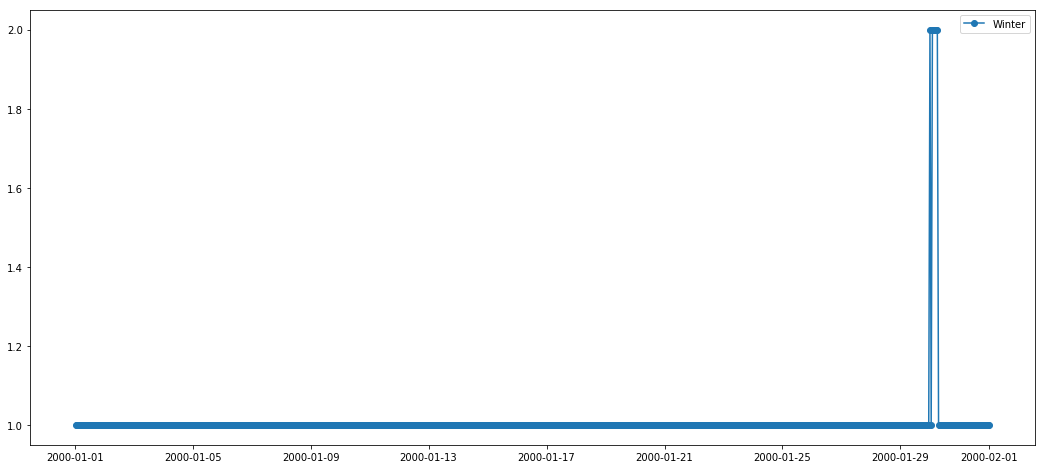

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
plt.plot(technology['OUT||Base0_1||demandFlag_price'], "o-", label="Winter", alpha=1)
#plt.plot(load_profile.Time,load_profile.Percent_summer, "o-", label="Summer", alpha=1)
plt.legend()